# Inspect results from 3 pipelines

In [11]:
def print_one_logvar_col(axes, epoch, col_id, logvar_true, manifold_name='Euclidean'):
    if manifold_name == 'Euclidean':
        output = '/scratch/users/nmiolane/toyoutput_logvarx_%d_n_10000_n_mc_iwae_10' % logvar_true
    elif manifold_name == 'S2':
        output = '/scratch/users/nmiolane/toyoutput_logvarx_%d_n_10000_n_mc_10_s2' % logvar_true
    elif manifold_name == 'H2':
        output = '/scratch/users/nmiolane/toyoutput_logvarx_%d_n_10000_n_mc_10_h2' % logvar_true
    crit_name = 'neg_elbo'
    ax = axes[0, col_id]
    #ax.set_xlabel('True log variance = %d' % logvar_true)
    ax.xaxis.set_label_position('top') 
    
    crit_name = 'neg_elbo'
    algo_name = 'vae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch)
    
    ax = axes[0, col_id]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[2, col_id]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])

    
    algo_name = 'iwae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch)
    ax = axes[1, col_id]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[2, col_id]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])

interactive(children=(IntSlider(value=0, description='epoch', max=299, step=10), Output()), _dom_classes=('wid…

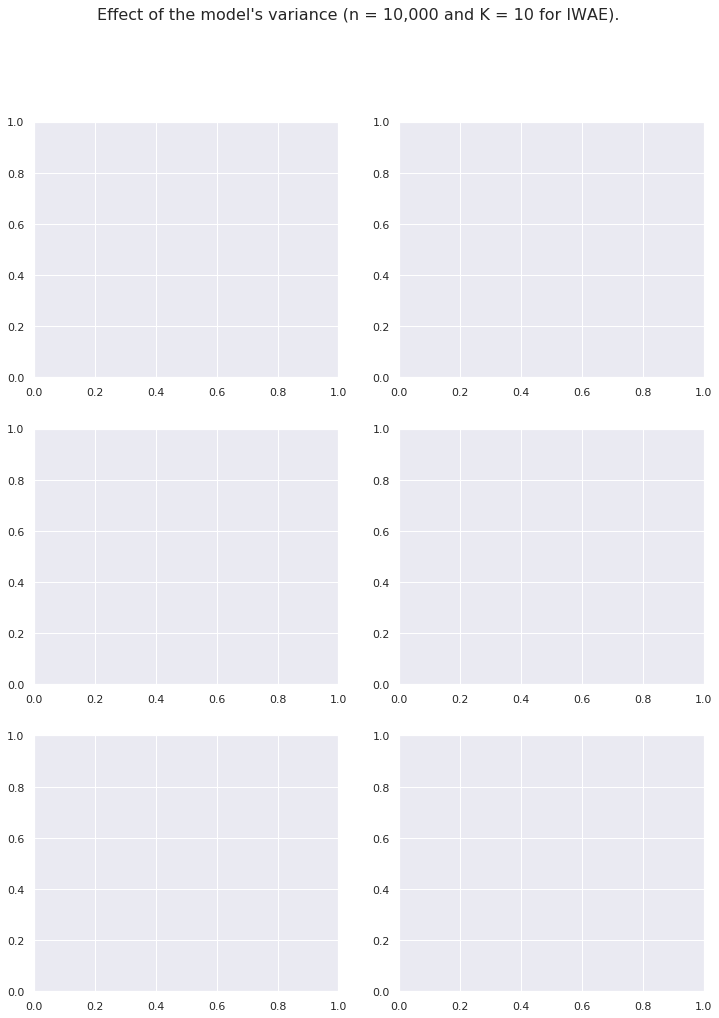

In [12]:
W_TRUE, B_TRUE, NONLINEARITY = (
 {0: [[3.0], [-2.0]],
  1: [[1.0, -1.0], [-3.0, -2.0]]},
 {0: [1.0, 3.0], 
  1: [1.0, 1.0]},
 'softplus')

@interact(
    epoch=IntSlider(min=0,max=299,step=10,value=0))
def display_training(epoch):
    sys.stdout = open(os.devnull, 'w')
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))  
    fig.suptitle('Effect of the model\'s variance (n = 10,000 and K = 10 for IWAE).', fontsize=16)
   

    print_one_logvar_col(axes, epoch, col_id=1, logvar_true=0)

    
    sys.stdout = sys.__stdout__
    
    return epoch

interactive(children=(IntSlider(value=0, description='epoch', max=299, step=10), Output()), _dom_classes=('wid…

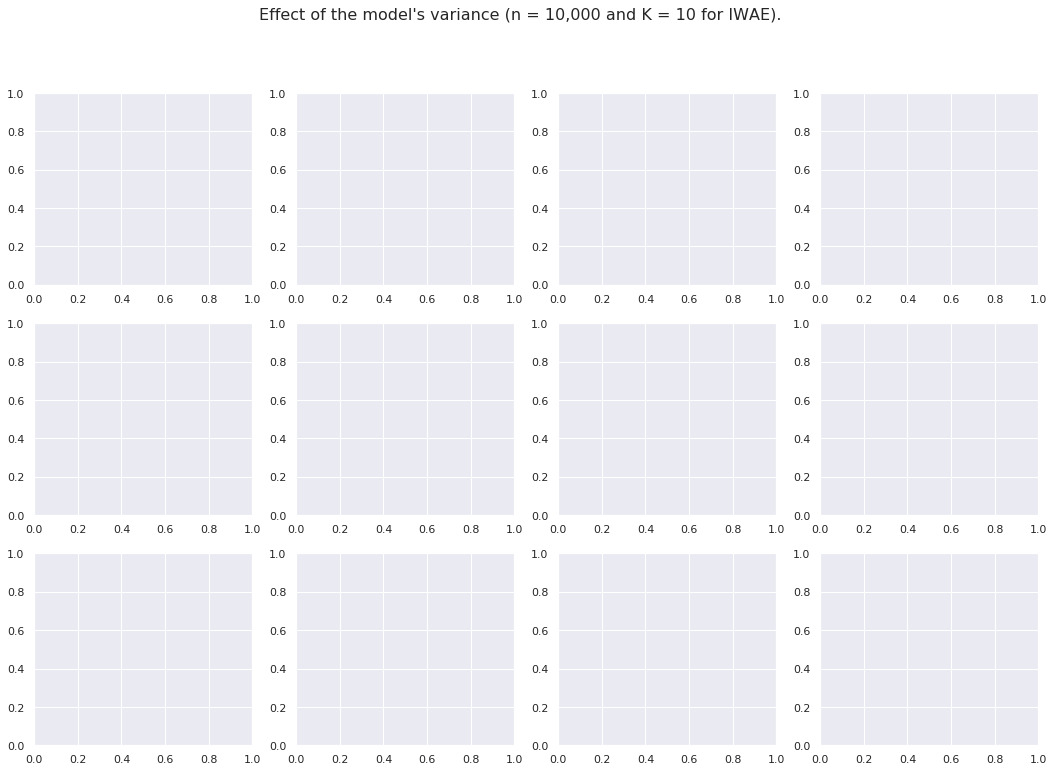

In [13]:
W_TRUE, B_TRUE, NONLINEARITY = (
 {0: [[3.0], [-2.0]],
  1: [[1.0, -1.0], [-3.0, -2.0]]},
 {0: [1.0, 3.0], 
  1: [1.0, 1.0]},
 'softplus')

@interact(
    epoch=IntSlider(min=0,max=299,step=10,value=0))
def display_training(epoch):
    sys.stdout = open(os.devnull, 'w')
    
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))  
    fig.suptitle('Effect of the model\'s variance (n = 10,000 and K = 10 for IWAE).', fontsize=16)
   
    print_one_logvar_col(axes, epoch, col_id=0, logvar_true=-5)
    print_one_logvar_col(axes, epoch, col_id=1, logvar_true=0)
    print_one_logvar_col(axes, epoch, col_id=2, logvar_true=2)  
    print_one_logvar_col(axes, epoch, col_id=3, logvar_true=5) 

    
    sys.stdout = sys.__stdout__
    
    return epoch

In [14]:
def print_col(axes, epoch, col_id, output, manifold_name='Euclidean'):
    crit_name = 'neg_elbo'
    algo_name = 'vae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch, manifold_name=manifold_name)
    
    ax = axes[0, col_id]
    ax = vis.plot_submanifolds(
        ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name, manifold_name=manifold_name)
    ax = axes[3, col_id]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])

    
    algo_name = 'iwae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch, manifold_name=manifold_name)
    ax = axes[1, col_id]
    ax = vis.plot_submanifolds(
        ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name, manifold_name=manifold_name)
    ax = axes[3, col_id]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])
    
        
    algo_name = 'vem'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch, manifold_name=manifold_name)
    ax = axes[2, col_id]
    ax = vis.plot_submanifolds(
        ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name, manifold_name=manifold_name)
    ax = axes[3, col_id]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])

In [15]:
def print_row(axes, epoch, row_id, output):
    crit_name = 'neg_elbo'
    algo_name = 'vae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch)
    
    ax = axes[row_id, 0]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[row_id, 4]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])

    
    algo_name = 'iwae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch)
    ax = axes[row_id, 1]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[row_id, 4]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])
        
    algo_name = 'vem'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch)
    ax = axes[row_id, 2]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[row_id, 4]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])
    
    algo_name = 'vem_02'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        output, algo_name, epoch)
    ax = axes[row_id, 3]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[row_id, 4]
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='train', dashes=False)
    ax = vis.plot_criterion(
        ax, output, algo_name, crit_name=crit_name, 
        color=ALGO_COLOR_DICT[algo_name], mode='val', dashes=True)
    ax.plot(epoch, train_losses[epoch], 'bo', markersize=10, color=ALGO_COLOR_DICT[algo_name])

In [16]:
def print_one_n_mc_col(axes, epoch, col_id, n_mc):
    output = '/scratch/users/nmiolane/toyoutput_logvarx_2_n_10000_n_mc_%d' % n_mc
    crit_name = 'neg_elbo'
    ax = axes[0, col_id]
    ax.set_xlabel('Number of MC samples = %d' % n_mc)
    ax.xaxis.set_label_position('top') 
    
    print_col(axes, epoch, col_id, output)

In [17]:
def print_one_n_mc_row(axes, epoch, row_id, n_mc):
    output = '/scratch/users/nmiolane/toyoutput_logvarx_2_n_10000_n_mc_%d' % n_mc
    crit_name = 'neg_elbo'
    ax = axes[row_id, 0]
    ax.set_ylabel('Number of MC samples = %d' % n_mc)
    
    print_row(axes, epoch, row_id, output)

interactive(children=(IntSlider(value=0, description='epoch', max=299, step=5), Output()), _dom_classes=('widg…

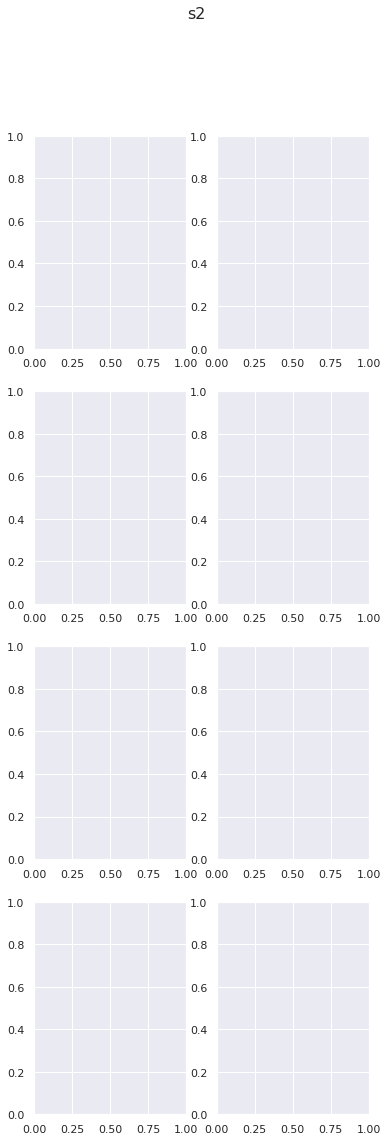

In [18]:
@interact(
    epoch=IntSlider(min=0,max=299,step=5,value=0))
def display_training(epoch):
    sys.stdout = open(os.devnull, 'w')
    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6, 18))  
    fig.suptitle('s2', 
        fontsize=16)
    output = '/scratch/users/nmiolane/toyoutput_logvarx_-5_n_10000_n_mc_10_s2'
    print_col(axes, epoch, 0, output, manifold_name='S2')
    
    sys.stdout = sys.__stdout__
    
    return epoch

interactive(children=(IntSlider(value=0, description='epoch', max=299, step=5), Output()), _dom_classes=('widg…

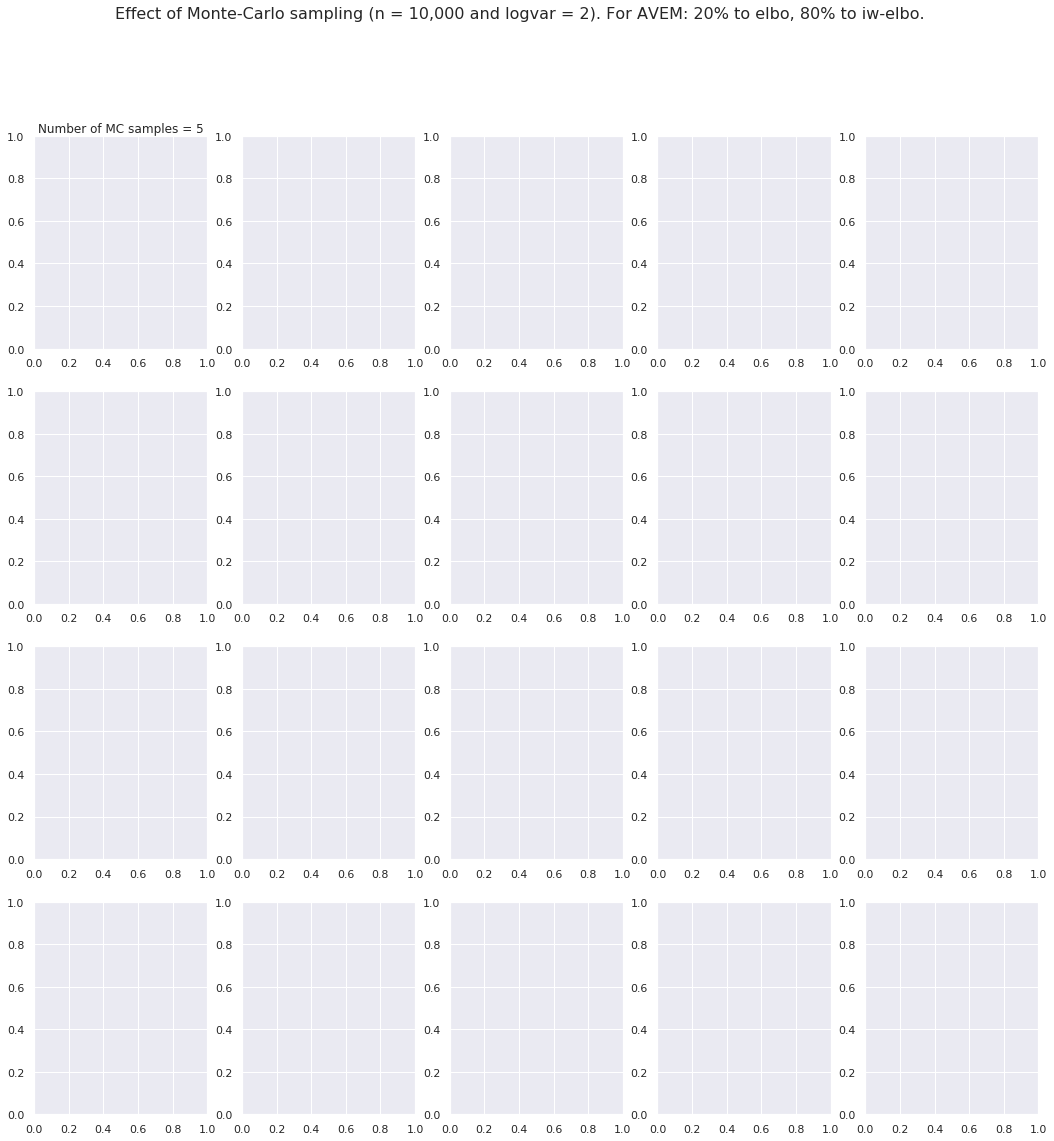

In [19]:

W_TRUE, B_TRUE, NONLINEARITY = (
 {0: [[3.0], [-2.0]],
  1: [[1.0, -1.0], [-3.0, -2.0]]},
 {0: [1.0, 3.0], 
  1: [1.0, 1.0]},
 'softplus')

@interact(
    epoch=IntSlider(min=0,max=299,step=5,value=0))
def display_training(epoch):
    sys.stdout = open(os.devnull, 'w')
    
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 18))  
    fig.suptitle(
        'Effect of Monte-Carlo sampling (n = 10,000 and logvar = 2).'
        ' For AVEM: 20% to elbo, 80% to iw-elbo.', 
        fontsize=16)
   
    print_one_n_mc_col(axes, epoch, col_id=0, n_mc=5)
    print_one_n_mc_col(axes, epoch, col_id=1, n_mc=10)
    print_one_n_mc_col(axes, epoch, col_id=2, n_mc=20)
    print_one_n_mc_col(axes, epoch, col_id=3, n_mc=100)
    print_one_n_mc_col(axes, epoch, col_id=4, n_mc=200)
    
    sys.stdout = sys.__stdout__
    
    return epoch

interactive(children=(IntSlider(value=0, description='epoch', max=299, step=5), Output()), _dom_classes=('widg…

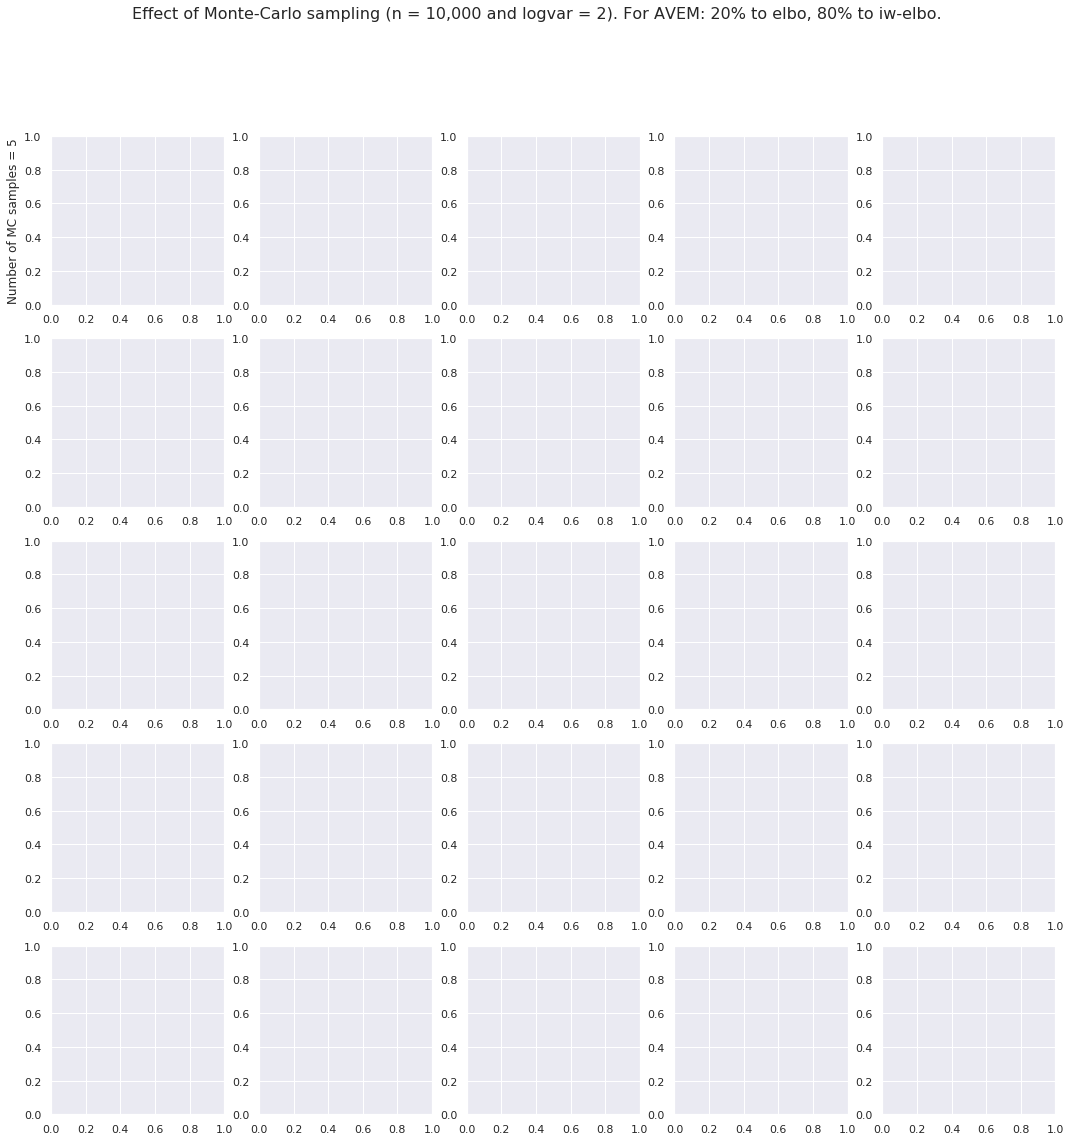

In [20]:

W_TRUE, B_TRUE, NONLINEARITY = (
 {0: [[3.0], [-2.0]],
  1: [[1.0, -1.0], [-3.0, -2.0]]},
 {0: [1.0, 3.0], 
  1: [1.0, 1.0]},
 'softplus')

@interact(
    epoch=IntSlider(min=0,max=299,step=5,value=0))
def display_training(epoch):
    sys.stdout = open(os.devnull, 'w')
    
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18, 18))  
    fig.suptitle(
        'Effect of Monte-Carlo sampling (n = 10,000 and logvar = 2).'
        ' For AVEM: 20% to elbo, 80% to iw-elbo.', 
        fontsize=16)
   
    print_one_n_mc_row(axes, epoch, row_id=0, n_mc=5)
    print_one_n_mc_row(axes, epoch, row_id=1, n_mc=10)
    print_one_n_mc_row(axes, epoch, row_id=2, n_mc=20)
    print_one_n_mc_row(axes, epoch, row_id=3, n_mc=100)
    print_one_n_mc_row(axes, epoch, row_id=4, n_mc=200)
    
    sys.stdout = sys.__stdout__
    
    return epoch

In [21]:
def print_one_n_row(axes, epoch, row_id, n):
    output = '/scratch/users/nmiolane/toyoutput_logvarx_2_n_%d_n_mc_10_vem_02' % n
    crit_name = 'neg_elbo'
    
    ax = axes[row_id, 0]
    ax.set_ylabel('Number of samples n = %d' % n)
    
    print_row(axes, epoch, row_id, output)

In [22]:
def print_one_n_col(axes, epoch, col_id, n):
    output = '/scratch/users/nmiolane/toyoutput_logvarx_2_n_%d_n_mc_10_vem_02' % n
    crit_name = 'neg_elbo'
    
    ax = axes[0, col_id]
    ax.set_xlabel('Number of samples n = %d' % n)
    ax.xaxis.set_label_position('top') 
    
    print_col(axes, epoch, col_id, output)

interactive(children=(IntSlider(value=0, description='epoch', max=299, step=5), Output()), _dom_classes=('widg…

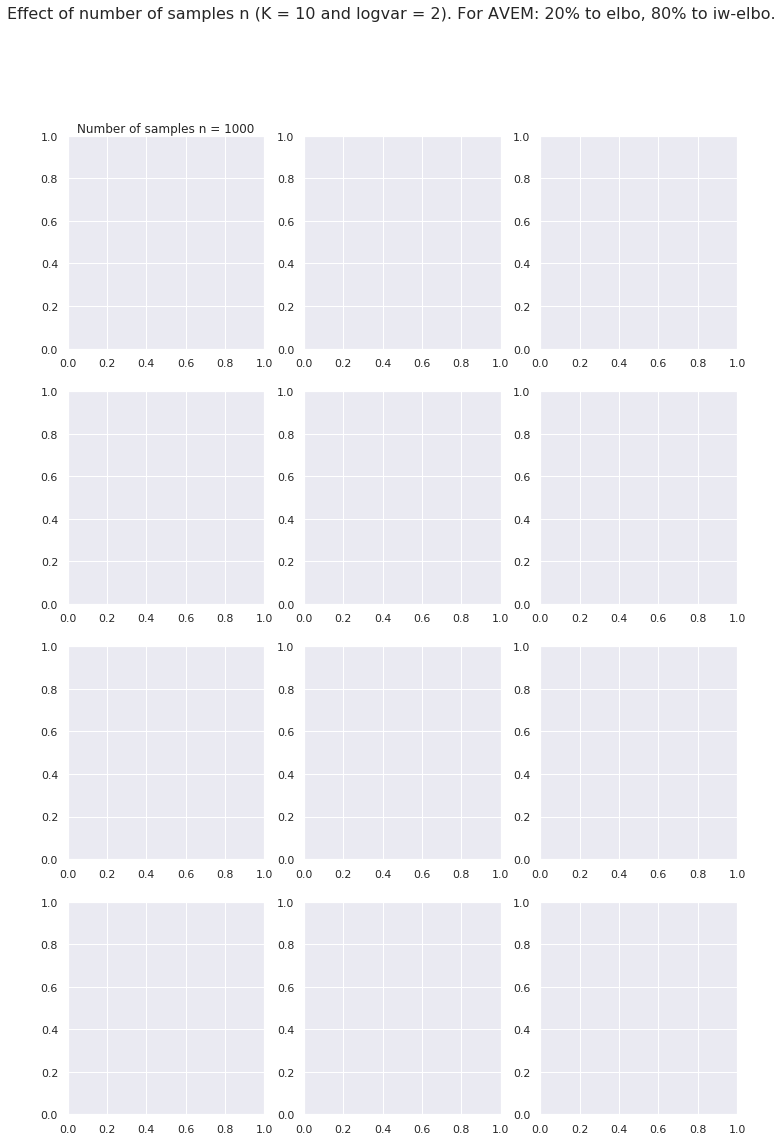

In [23]:
W_TRUE, B_TRUE, NONLINEARITY = (
 {0: [[3.0], [-2.0]],
  1: [[1.0, -1.0], [-3.0, -2.0]]},
 {0: [1.0, 3.0], 
  1: [1.0, 1.0]},
 'softplus')

@interact(
    epoch=IntSlider(min=0,max=299,step=5,value=0))
def display_training(epoch):
    sys.stdout = open(os.devnull, 'w')
    
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 18))  
    fig.suptitle(
        'Effect of number of samples n (K = 10 and logvar = 2).'
        ' For AVEM: 20% to elbo, 80% to iw-elbo.', 
        fontsize=16)
   
    print_one_n_col(axes, epoch, col_id=0, n=1000)
    print_one_n_col(axes, epoch, col_id=1, n=10000)
    print_one_n_col(axes, epoch, col_id=2, n=100000)

    sys.stdout = sys.__stdout__
    
    return epoch

interactive(children=(IntSlider(value=0, description='epoch', max=299, step=5), Output()), _dom_classes=('widg…

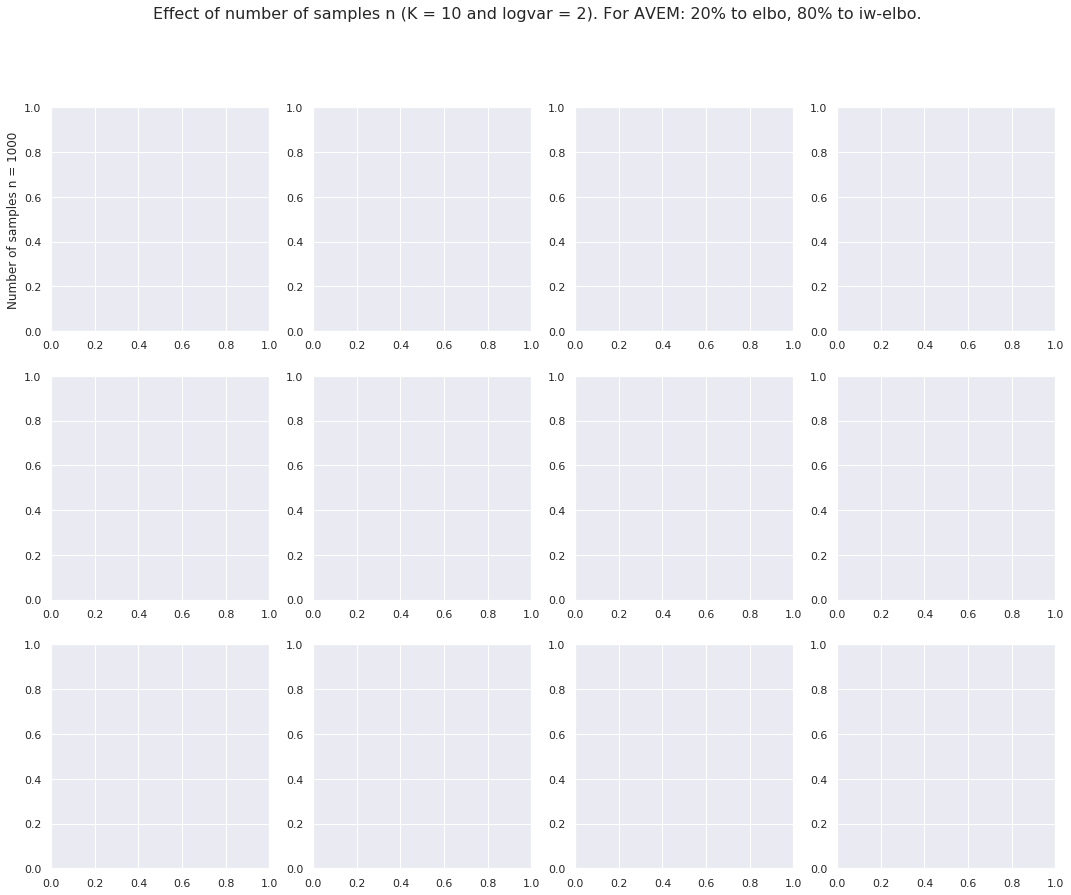

In [24]:
W_TRUE, B_TRUE, NONLINEARITY = (
 {0: [[3.0], [-2.0]],
  1: [[1.0, -1.0], [-3.0, -2.0]]},
 {0: [1.0, 3.0], 
  1: [1.0, 1.0]},
 'softplus')

@interact(
    epoch=IntSlider(min=0,max=299,step=5,value=0))
def display_training(epoch):
    sys.stdout = open(os.devnull, 'w')
    
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 14))  
    fig.suptitle(
        'Effect of number of samples n (K = 10 and logvar = 2).'
        ' For AVEM: 20% to elbo, 80% to iw-elbo.', 
        fontsize=16)
   
    print_one_n_row(axes, epoch, row_id=0, n=1000)
    print_one_n_row(axes, epoch, row_id=1, n=10000)
    print_one_n_row(axes, epoch, row_id=2, n=100000)

    sys.stdout = sys.__stdout__
    
    return epoch

# Look at more the $z_i$ given then $\tilde z_i$

To use the approximation of orthogonal projection, we need to show that $f_\theta(q_\phi(z_i|x_i))$ is centered around the orthogonal projection of $x_i$ on the current manifold characterized by $\theta$. (and that the variance of the approximated posterior is not too big).

We take the true generator, and the VAE. We take one point from the true generator and learn the $\mu, \sigma$ of the corresponding approximated posterior. We decode several samples and plot them in 2D.

In [54]:
def sample_from_posterior_on_manifold(output, epoch, algo_name, x, n_samples=30):
    decoder_vae = train_utils.load_module(
        output, algo_name=algo_name, module_name='decoder', epoch_id=epoch)
    encoder_vae = train_utils.load_module(
        output, algo_name=algo_name, module_name='encoder', epoch_id=epoch)
    
    mu, logvar = encoder_vae(x)
    sampled_z = toynn.reparametrize(mu, logvar, n_samples=n_samples)
    sampled_x, _ = decoder_vae(sampled_z)
    return sampled_x

def plot_posterior_on_manifold(ax, output, epoch, algo_name, x, n_samples=30):
    sampled_x = sample_from_posterior_on_manifold(
        output, epoch, algo_name, x, n_samples)
    
    _, gen_true_x_novarx, _, gen_x_novarx, _, _ = vis.get_training_data(
        output, algo_name, epoch)
    
    vis.plot_data(gen_true_x_novarx, color='lime', label='True submanifold', ax=ax)
    vis.plot_data(gen_x_novarx, color='black', label='Learned submanifold', ax=ax)

    x = x.detach().cpu().numpy()
    sampled_x = sampled_x.detach().cpu().numpy()
    vis.plot_data(x, color='green', s=300, ax=ax)
    vis.plot_data(sampled_x, color=ALGO_COLOR_DICT[algo_name], s=100, ax=ax)
    return ax

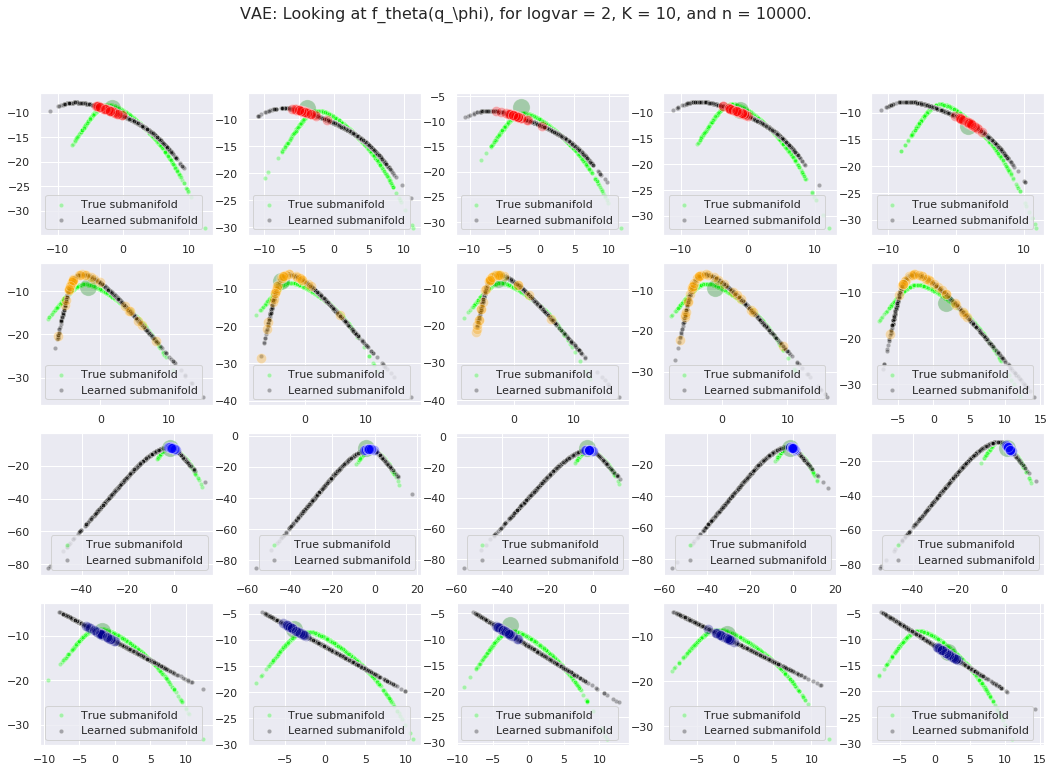

In [96]:
nrows = 4
ncols = 5
algo_names = ['vae', 'iwae', 'vem', 'vem_02']

output = '/scratch/users/nmiolane/toyoutput_logvarx_2_n_10000_n_mc_100'
decoder_true = torch.load(os.path.join(output, 'synthetic/decoder_true.pth'), map_location=DEVICE)
epoch = 299

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
fig.suptitle(
            '%s: Looking at f_theta(q_\phi),'
            ' for logvar = 2, K = 10, and n = 10000.' % 'VAE', fontsize=16)
sys.stdout = open(os.devnull, 'w')

for j in range(ncols):
    x = toynn.generate_from_decoder(decoder_true)
    x = torch.Tensor(x).to(DEVICE)
    for i, algo_name in enumerate(algo_names):      
        ax = axes[i, j]
        ax = plot_posterior_on_manifold(ax, output, epoch, algo_name, x, n_samples=30)

In [157]:
@interact(
    w0_00=FloatSlider(min=-3,max=3,step=0.5,value=3), 
    w0_01=FloatSlider(min=-3,max=3,step=0.5,value=-2),
    b0_00=FloatSlider(min=-3,max=3,step=0.5,value=1),
    b0_01=FloatSlider(min=-3,max=3,step=0.5,value=3),
    w1_00=FloatSlider(min=-3,max=3,step=0.5,value=1), 
    w1_01=FloatSlider(min=-3,max=3,step=0.5,value=-1),
    w1_10=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w1_11=FloatSlider(min=-3,max=3,step=0.5,value=-2),
    b1_00=FloatSlider(min=-3,max=3,step=0.5,value=1),
    b1_01=FloatSlider(min=-3,max=3,step=0.5,value=1),
    w2_00=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w2_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    w2_10=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w2_11=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b2_00=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b2_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
        w3_00=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w3_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    w3_10=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w3_11=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b3_00=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b3_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
        w4_00=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w4_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    w4_10=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w4_11=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b4_00=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b4_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
        w5_00=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w5_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    w5_10=FloatSlider(min=-3,max=3,step=0.5,value=-3), 
    w5_11=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b5_00=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    b5_01=FloatSlider(min=-3,max=3,step=0.5,value=-3),
    nonlinearity=RadioButtons(
        options=[None, 'relu', 'softplus', 'tanh', 'sigmoid'],
        value='softplus',
        description='Non linearity:',
        disabled=False))
def display_data(w0_00, w0_01, b0_00, b0_01, 
                 w1_00, w1_01, w1_10, w1_11, b1_00, b1_01,
                 w2_00, w2_01, w2_10, w2_11, b2_00, b2_01, 
                 w3_00, w3_01, w3_10, w3_11, b3_00, b3_01, 
                 w4_00, w4_01, w4_10, w4_11, b4_00, b4_01, 
                 w5_00, w5_01, w5_10, w5_11, b5_00, b5_01, 
                 nonlinearity):
    W_TRUE = {}
    B_TRUE = {}

    W_TRUE[0] = [[w0_00], [w0_01]]
    B_TRUE[0] = [b0_00, b0_01]

    W_TRUE[1] = [[w1_00, w1_01], [w1_10, w1_11]]
    B_TRUE[1] = [b1_00, b1_01]
    
    W_TRUE[2] = [[w2_00, w2_01], [w2_10, w2_11]]
    B_TRUE[2] = [b2_00, b2_01]
    
    W_TRUE[3] = [[w3_00, w3_01], [w3_10, w3_11]]
    B_TRUE[3] = [b3_00, b3_01]
    # For the reconstruction
    W_TRUE[4] = [[w4_00, w4_01], [w4_10, w4_11]]
    B_TRUE[4] = [b4_00, b4_01]

    # For the logvarx
    W_TRUE[5] = [[w5_00, w5_01], [w5_10, w5_11]]
    B_TRUE[5] = [b5_00, b5_01]
    decoder_true = toynn.make_decoder_true(
        w_true=W_TRUE, b_true=B_TRUE, latent_dim=1, 
        data_dim=2, n_layers=5,
        nonlinearity=nonlinearity, with_biasx=True, with_logvarx=False)
    generated_true_x = toynn.generate_from_decoder(decoder_true, 300)
    
    W_TRUE[5] = [[-1000., -1000.], [-1000., -1000.]]
    B_TRUE[5] = [-1000., -1000.]
    decoder_true_novarx = toynn.make_decoder_true(
        w_true=W_TRUE, b_true=B_TRUE, latent_dim=1, 
        data_dim=2, n_layers=5,
        nonlinearity=nonlinearity, with_biasx=True, with_logvarx=True)
    generated_true_x_novarx = toynn.generate_from_decoder(decoder_true_novarx, 300)

    fig, ax = plt.subplots()
    ax = vis.plot_data(generated_true_x, color='green', label='from decoder true', ax=ax)
    ax = vis.plot_data(generated_true_x_novarx, color='lime', label='from decoder true', ax=ax)

    ax.axis('equal')
    return W_TRUE, B_TRUE, nonlinearity

interactive(children=(FloatSlider(value=3.0, description='w0_00', max=3.0, min=-3.0, step=0.5), FloatSlider(va…

In [20]:
OUTPUT = '/scratch/users/nmiolane/toyoutput_5layers'

W_TRUE, B_TRUE, NONLINEARITY = ({0: [[3.0], [-3.0]],
  1: [[2.5, 0.0], [-3.0, -2.0]],
  2: [[-0.5, -1.5], [-1.5, 2.5]],
  3: [[1.5, 0.0], [-2.5, -1.5]],
  4: [[-2.5, 0.5], [0.5, -2.5]],
  5: [[-1000.0, -1000.0], [-1000.0, -1000.0]]},
 {0: [1.0, -2.5],
  1: [1.0, 2.0],
  2: [3.0, 3.0],
  3: [1.0, -1.0],
  4: [-2.0, -1.0],
  5: [-1000.0, -1000.0]},
 'softplus')

decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)
generated_true_x = toynn.generate_from_decoder(decoder_true, 300)

decoder_true_novarx = toynn.make_decoder_true(
        w_true=W_TRUE, b_true=B_TRUE, latent_dim=1, 
        data_dim=2, n_layers=5,
        nonlinearity=NONLINEARITY, with_biasx=True, with_logvarx=True)
generated_true_x_novarx = toynn.generate_from_decoder(decoder_true_novarx, 300)

@interact(
    epoch=FloatSlider(min=0,max=120,step=1,value=0))
def display_training(epoch):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    
    algo_name = 'vae'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[0]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name, xlim=(-14, 5), ylim=(-10, 5))
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
    
    algo_name = 'iwae'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[1]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name)
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
          
    algo_name = 'vem'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[2]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name)    
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
    
    return epoch

interactive(children=(FloatSlider(value=0.0, description='epoch', max=120.0, step=1.0), Output()), _dom_classe…

# Same, with 100,000 samples generated instead of 10,000

In [27]:
OUTPUT = '/scratch/users/nmiolane/toyoutput_5layers_n100000'

W_TRUE, B_TRUE, NONLINEARITY = ({0: [[3.0], [-3.0]],
  1: [[2.5, 0.0], [-3.0, -2.0]],
  2: [[-0.5, -1.5], [-1.5, 2.5]],
  3: [[1.5, 0.0], [-2.5, -1.5]],
  4: [[-2.5, 0.5], [0.5, -2.5]],
  5: [[-1000.0, -1000.0], [-1000.0, -1000.0]]},
 {0: [1.0, -2.5],
  1: [1.0, 2.0],
  2: [3.0, 3.0],
  3: [1.0, -1.0],
  4: [-2.0, -1.0],
  5: [-1000.0, -1000.0]},
 'softplus')

decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)
generated_true_x = toynn.generate_from_decoder(decoder_true, 300)


decoder_true_novarx = toynn.make_decoder_true(
        w_true=W_TRUE, b_true=B_TRUE, latent_dim=1, 
        data_dim=2, n_layers=5,
        nonlinearity=NONLINEARITY, with_biasx=True, with_logvarx=True)
generated_true_x_novarx = toynn.generate_from_decoder(decoder_true_novarx, 300)

@interact(
    epoch=FloatSlider(min=0,max=79,step=1,value=0))
def display_training(epoch):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    
    algo_name = 'vae'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[0]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name, xlim=(-14, 5), ylim=(-10, 5))
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
    
    algo_name = 'iwae'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[1]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name)
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
          
    algo_name = 'vem'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[2]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name)    
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
    
    return epoch

interactive(children=(FloatSlider(value=0.0, description='epoch', max=79.0, step=1.0), Output()), _dom_classes…

# With logvarz and biasz, 10000

In [32]:
OUTPUT = '/scratch/users/nmiolane/toyoutput'

W_TRUE, B_TRUE, NONLINEARITY = ({0: [[3.0], [-3.0]],
  1: [[2.5, 0.0], [-3.0, -2.0]],
  2: [[-0.5, -1.5], [-1.5, 2.5]],
  3: [[1.5, 0.0], [-2.5, -1.5]],
  4: [[-2.5, 0.5], [0.5, -2.5]],
  5: [[-1000.0, -1000.0], [-1000.0, -1000.0]]},
 {0: [1.0, -2.5],
  1: [1.0, 2.0],
  2: [3.0, 3.0],
  3: [1.0, -1.0],
  4: [-2.0, -1.0],
  5: [-1000.0, -1000.0]},
 'softplus')

decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)
generated_true_x = toynn.generate_from_decoder(decoder_true, 300)


decoder_true_novarx = toynn.make_decoder_true(
        w_true=W_TRUE, b_true=B_TRUE, latent_dim=1, 
        data_dim=2, n_layers=5,
        nonlinearity=NONLINEARITY, with_biasx=True, with_logvarx=True)
generated_true_x_novarx = toynn.generate_from_decoder(decoder_true_novarx, 300)

@interact(
    epoch=FloatSlider(min=0,max=79,step=1,value=0))
def display_training(epoch):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    
    algo_name = 'vae'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[0]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name, xlim=(-14, 5), ylim=(-10, 5))
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
    
    algo_name = 'iwae'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[1]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name)
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
          
    algo_name = 'vem'
    generated_x, generated_x_novarx, train_losses_total, val_losses_total = get_training_data(
        algo_name, epoch)
    ax = axes[2]
    ax = plot_points(ax, generated_x, generated_x_novarx, algo_name)    
    ax = axes[3]
    ax = plot_losses(ax, train_losses_total, val_losses_total, algo_name)
    
    return epoch

interactive(children=(FloatSlider(value=0.0, description='epoch', max=79.0, step=1.0), Output()), _dom_classes…

interactive(children=(FloatSlider(value=0.0, description='epoch', max=79.0, step=1.0), Output()), _dom_classes…

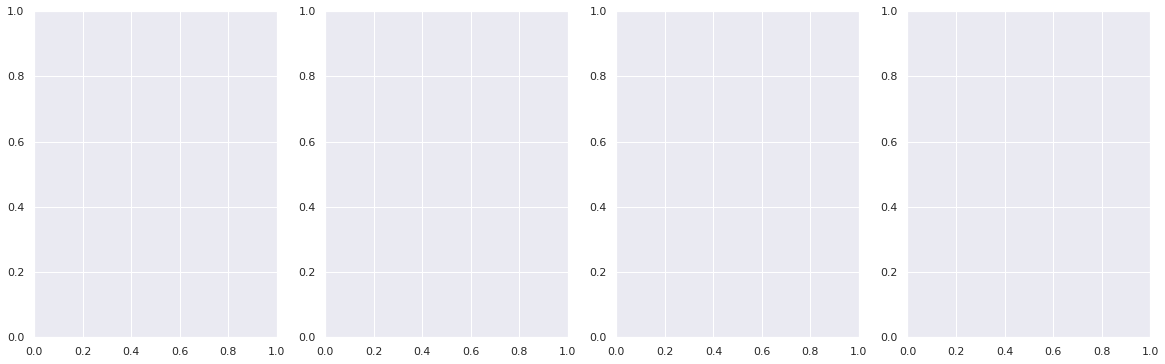

In [88]:
OUTPUT = '/scratch/users/nmiolane/toyoutput_2layers'

W_TRUE, B_TRUE, NONLINEARITY = ({0: [[3.0], [-2.0]],
  1: [[1.0, -1.0], [-3.0, -2.0]],
  2: [[-3.0, -3.0], [-3.0, -3.0]]},
 {0: [1.0, 3.0], 1: [1.0, 1.0], 2: [-3.0, -3.0]},
 'softplus')


@interact(
    epoch=FloatSlider(min=0,max=79,step=1,value=0))
def display_training(epoch):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
    
    algo_name = 'iwae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        OUTPUT, algo_name, epoch)
    ax = axes[0]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[3]
    ax = plot_losses(ax, train_losses, val_losses, algo_name)
    
    algo_name = 'iwae'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        OUTPUT, algo_name, epoch)
    ax = axes[1]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[3]
    ax = plot_losses(ax, train_losses, val_losses, algo_name)
          
    algo_name = 'vem'
    gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, train_losses, val_losses = vis.get_training_data(
        OUTPUT, algo_name, epoch)
    ax = axes[2]
    ax = vis.plot_submanifolds(ax, epoch, gen_true_x, gen_true_x_novarx, gen_x, gen_x_novarx, algo_name)
    ax = axes[3]
    ax = plot_losses(ax, train_losses, val_losses, algo_name)
    
    return epoch

In [ ]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
fig.suptitle(
            '%s: Looking at f_theta(q_\phi),'
            ' for logvar = 2, K = 10, and n = 10000.' % 'VAE', fontsize=16)

def on_button_clicked(b, ax):
    #with output:
        decoder_true = torch.load(os.path.join(OUTPUT, 'synthetic/decoder_true.pth'), map_location=DEVICE)
        x = toynn.generate_from_decoder(decoder_true)
        x = torch.Tensor(x).to(DEVICE)



        output = '/scratch/users/nmiolane/toyoutput_n_mc_10_n_10000'
        epoch = 299

        ax = plot_posterior_on_manifold(ax, output, epoch, algo_name, x, n_samples=30)

button.on_click(on_button_clicked(button, ax))